In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [179]:
# Load in our dataset
df = pd.read_csv('../data/raw/dog_data_popularity.csv', low_memory=False)

# Sort data by year -- this is important for plotting correctly
df = df.sort_values('Year', ascending=True)

# Create a variable of yearly rank by the number of registrations
df['RankYear'] = df.groupby('Year')['Registrations'].rank(ascending=False)

# Keep data only with ranks in the top 20
df_top = df[df.RankYear <= 10]
df_top_breeds = list(set(df_top['Breed']))

df_top = df[df.Breed.isin(df_top_breeds)]

breed_score = df[['Breed','RankYear']].groupby('Breed').sum().reset_index()
breed_score.sort_values('RankYear', inplace=True)
breed_score = breed_score[breed_score.Breed.isin(df_top_breeds)]

In [189]:
dog_cols = {
'Retriever (Labrador)':'#E2CBA4',
'Retriever (Golden)':'#FEC83E',
'Pug':'#D6CBC7',
'Border Terrier':'#9E9E9E',
'Whippet':'#494C55',
'Beagle':'#D4DE60',
'Bulldog':'#51B6AC',
'Staffordshire Bull Terrier':'#FD9626',
'Chihuahua (Long Coat)':'#36B7BB',
'Chihuahua (Smooth Coat)':'#51B6AC',
'West Highland White Terrier':'#807E40',
'Boxer':'#7EB24A',
'Rottweiler':'#46433E',
'Cavalier King Charles Spaniel':'#EA447B',
'Dachshund (Miniature Smooth Haired)':'#327C36',
'Boston Terrier':'#556F79',
'German Shepherd Dog':'#B26B3E',
'Bichon Frise':'#556F79',
'Dogue de Bordeaux':'#479F4B',
'Yorkshire Terrier':'#ED6C1F',
'Bull Terrier':'#79909B',
'Miniature Schnauzer':'#6740B4',
'Hungarian Vizsla':'#84DEE9',
'Spaniel (English Springer)':'#A6C3BB',
'Shih Tzu':'#12828F',
'Lhasa Apso':'#EC5453',
'Spaniel (Cocker)':'#92D0C0',
'French Bulldog':'#34B7F3'}

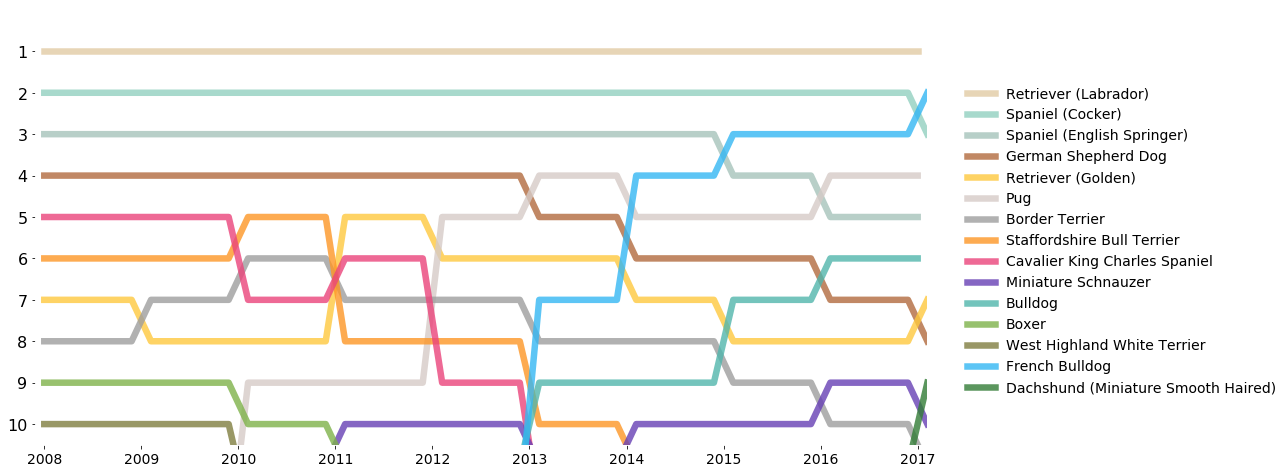

In [190]:
fig, ax = plt.subplots(figsize=(16,8))
for index, row in breed_score.iterrows():
    breed = row['Breed']
    df_breed = df_top[df_top.Breed == breed].reset_index()
    colour = dog_cols.get(breed)
    master = []
    for index, row in df_breed.iterrows():
        if index == 0:
            curr_rank = row['RankYear']
            neww_rank = curr_rank
        else:
            neww_rank = row['RankYear']

        if curr_rank != neww_rank: 
            data = (row['Year'] + 0.1, row['RankYear'], row['Breed'])
            master.append(data)
        
            data = (row['Year'] - 0.1, curr_rank, row['Breed'])
            master.append(data)
            curr_rank = neww_rank
        else:
            data = (row['Year'], row['RankYear'], row['Breed'])
            master.append(data)

    plot_df = pd.DataFrame(master, columns=['Year','RankYear','Breed'])
    plot_df = plot_df.sort_values('Year')
    plt.plot(plot_df.Year, plot_df.RankYear, linewidth=6.5, alpha=0.8, label=breed, c=colour)
    
# Limit axes
plt.ylim(0,10.5)
plt.xlim(2007.9,2017.1)

# Invert the y-axis
plt.gca().invert_yaxis()

# Plot legend
plt.legend(loc='center left', bbox_to_anchor=(1.03, 0.47), frameon=False, fontsize=14)

# Colour axis lines to match background
ax.spines['left'].set_color('#FFFFFF')
ax.spines['bottom'].set_color('#FFFFFF')
sns.despine()

# Yearly Intervals and Single Ranks
plt.yticks(np.arange(1, 11, 1), fontsize=16)
plt.xticks(np.arange(2008, 2018, 1), fontsize=14)
plt.show()

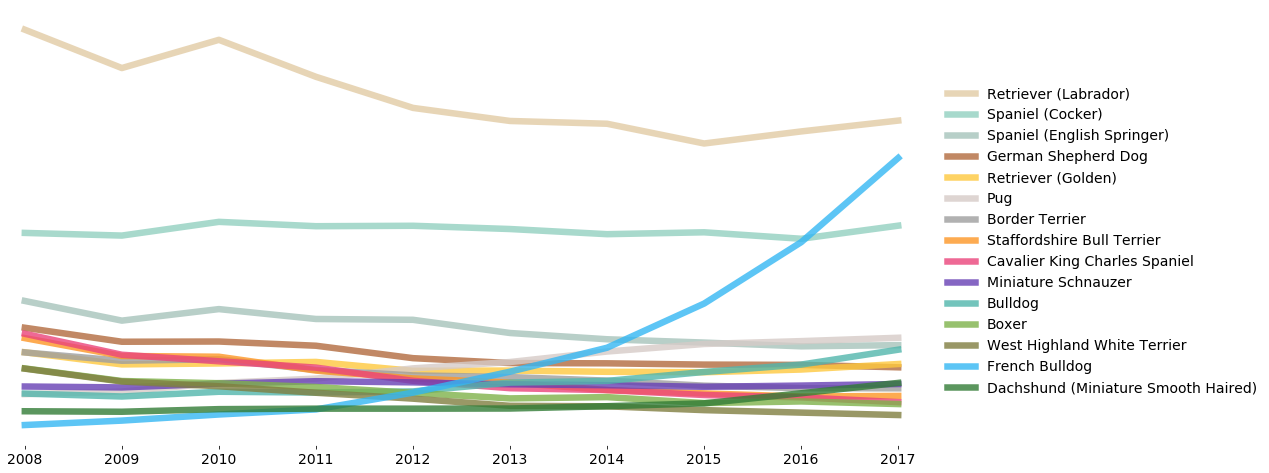

In [210]:
fig, ax = plt.subplots(figsize=(16,8))
for index, row in breed_score.iterrows():
    breed = row['Breed']
    df_breed = df_top[df_top.Breed == breed].reset_index()
    colour = dog_cols.get(breed)
    df_breed = df_breed.sort_values('Year')
    plt.plot(df_breed.Year, df_breed.Registrations, linewidth=6.5, alpha=0.8, label=breed, c=colour)
    
plt.xlim(2007.9,2017.1)
plt.legend(loc='center left', bbox_to_anchor=(1.03, 0.47), frameon=False, fontsize=14)
ax.set_yticks([])
ax.spines['bottom'].set_color('#FFFFFF')
sns.despine(left=True)
plt.xticks(np.arange(2008, 2018, 1), fontsize=14)
plt.show()